In [112]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [113]:
def drawRect(img, rect):
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img,[box],0,(0,255,0),2)

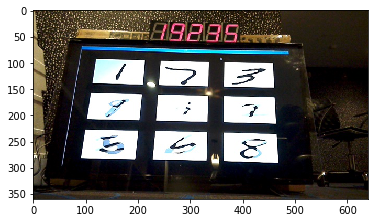

In [114]:
img = cv2.imread('./debug_5.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

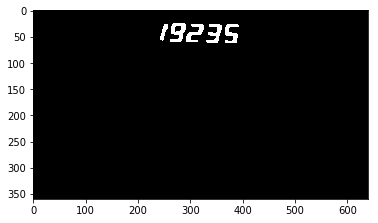

In [115]:
bgr = cv2.split(img)
red = bgr[2] - 1.0*bgr[1]
ret, red_mask = cv2.threshold(red, 90, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_DILATE, kernel).astype('uint8')
plt.imshow(red_mask, cmap='gray')
plt.show()

[((379.0, 44.5), (26.0, 35.0), -0.0), ((346.119873046875, 44.297393798828125), (38.1627311706543, 24.481155395507812), -79.04593658447266), ((308.8106689453125, 43.75443649291992), (42.9230842590332, 25.4615421295166), -67.38013458251953), ((249.89012145996094, 41.67356491088867), (33.521358489990234, 8.521422386169434), -73.61045837402344), ((276.6651306152344, 42.601322174072266), (37.207420349121094, 28.890975952148438), -85.03025817871094)]


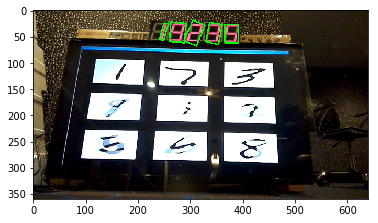

In [116]:
im2, sct_cnts, hierarchy = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.minAreaRect(cnt) for cnt in sct_cnts]
print(rects)
for r in rects:
    drawRect(img, r)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()